## Template / example for generic modeling

There are 2 options for obtaining discretized data:
1. **Loading from pre-existing pickle file** (automatically created after running `python compile_annotations.py --di`)**
    * Pro: The pickle file has already been prepared, so just need to load
    * Con: Prepared with default parameters for segment length, hop length, overlap threshold
2. **Using the utility function `discretize_all()`** (found in `common/annotation_utils`)
    * Pro: Allows for custom setting of segment length, hop length, overlap threshold, e.g. for grid search
    
Below shows examples of how to use each:

### Method 1: loading from pre-existing pickle file:

In [4]:
%load_ext autoreload
%autoreload 2
# - IPython extension to reload modules before executing user code
# autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.

In [5]:
import pickle, os, sys

repo_base_directory = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(repo_base_directory)
from common.annotation_utils import *

In [6]:
f = open("../../audio_annotation/outputs/discretized_dict.pkl", "rb")
discretized_dict = pickle.load(f)

In [7]:
discretized_dict.keys()

dict_keys(['data', 'segment_length', 'hop_length', 'overlap_thresh'])

### Method 2: using discretize_all:

In [3]:
combined_annotations_filepath = '../../audio_annotation/outputs/compiled_annotations_df.pkl'
_, discretized_dict = discretize_all(combined_annotations_filepath, 
                                     audio_filepath = '../../data/audio',
                                     segment_length = 2.5, 
                                     hop_length = 0.5, 
                                     overlap_thresh = 0.2)

Trying ../../data/audio/6hoNS9LR1Lxb4EzMX72kXR.ogg...
Trying ../../data/audio/79aiOALBohH9vEIUHPAoRj.ogg...
Error: Detected audio duration is greater than 10 hours
Trying to use mp3 file
mp3 load successful
Trying ../../data/audio/0pIwpmg5oPcMWJXVSyrx4E.ogg...
Error: Detected audio duration is greater than 10 hours
Trying to use mp3 file
mp3 load successful
Trying ../../data/audio/7LxbgPH3grqf6lCpLKEwo7.ogg...
Error: Detected audio duration is greater than 10 hours
Trying to use mp3 file
mp3 load successful
Trying ../../data/audio/7vxD3WNDRkigLnIDHyy0cu.ogg...
Error: Detected audio duration is greater than 10 hours
Trying to use mp3 file
mp3 load successful
Trying ../../data/audio/7r367wUYs1EvyBbeyOcq39.ogg...
Error: Detected audio duration is greater than 10 hours
Trying to use mp3 file
mp3 load successful
Trying ../../data/audio/0TkGYYIPwRqx8xzP0XGvRG.ogg...
Trying ../../data/audio/1XgTQnRlfJ0zpDdg2DccbR.ogg...
Error: Detected audio duration is greater than 10 hours
Trying to use mp3

### Details about discretized_dict:

discretized_dict stores info on universal discretization parameters (segment length, hop length, overlap threshold):

In [4]:
segment_length = discretized_dict['segment_length']
hop_length = discretized_dict['hop_length']
overlap_thresh = discretized_dict['overlap_thresh']

discretized_data also stores episode-specific data, in 'data'

In [5]:
list(discretized_dict['data'].keys())

['6hoNS9LR1Lxb4EzMX72kXR',
 '79aiOALBohH9vEIUHPAoRj',
 '0pIwpmg5oPcMWJXVSyrx4E',
 '7LxbgPH3grqf6lCpLKEwo7',
 '7vxD3WNDRkigLnIDHyy0cu',
 '7r367wUYs1EvyBbeyOcq39',
 '0TkGYYIPwRqx8xzP0XGvRG',
 '1XgTQnRlfJ0zpDdg2DccbR',
 '2hgBlERSFYDWndqjWNOV6v',
 '1jfWVd1sTapjjkQwDM4yQX',
 '2DCEgkjSeRQyMt8KovG8vF']

Each episode ID is mapped to a dictionary:

In [6]:
example_episode_id = list(discretized_dict['data'].keys())[0]
discretized_dict['data'][example_episode_id]

{'audio_duration': 2950.974693877551,
 'filetype': '.ogg',
 'y': array([0, 0, 0, ..., 0, 0, 0])}

Example exploration:
Which episode have the highest proportion of chunks which are disagreement?

In [7]:
prop_disagree = [(e, np.sum(discretized_dict['data'][e]['y'])/len(discretized_dict['data'][e]['y'])) for e in discretized_dict['data']]
prop_disagree.sort(key=lambda x: x[1], reverse = True)
prop_disagree

[('1XgTQnRlfJ0zpDdg2DccbR', 0.06505510131532172),
 ('7r367wUYs1EvyBbeyOcq39', 0.064340239912759),
 ('0pIwpmg5oPcMWJXVSyrx4E', 0.04568527918781726),
 ('6hoNS9LR1Lxb4EzMX72kXR', 0.043411904358148214),
 ('2DCEgkjSeRQyMt8KovG8vF', 0.0407673860911271),
 ('0TkGYYIPwRqx8xzP0XGvRG', 0.03986710963455149),
 ('7vxD3WNDRkigLnIDHyy0cu', 0.032397408207343416),
 ('7LxbgPH3grqf6lCpLKEwo7', 0.03033980582524272),
 ('2hgBlERSFYDWndqjWNOV6v', 0.026465028355387523),
 ('79aiOALBohH9vEIUHPAoRj', 0.020539382032505805),
 ('1jfWVd1sTapjjkQwDM4yQX', 0.014084507042253521)]

### Example processing for a single episode:

In [8]:
def process_chunk(audio_filepath, start_time, segment_length):
    waveform, sr = librosa.load(path = audio_filepath,
                         offset = start_time, 
                         duration = segment_length)
    S = librosa.feature.melspectrogram(y = waveform, sr = sr, n_mels = 216)
    return S

In [12]:
audio_duration = discretized_dict['data'][example_episode_id]['audio_duration']
chunks = np.arange(0, audio_duration - segment_length, hop_length)
y = discretized_dict['data'][example_episode_id]['y']
audio_filepath = f'../../data/audio/{example_episode_id}.ogg'

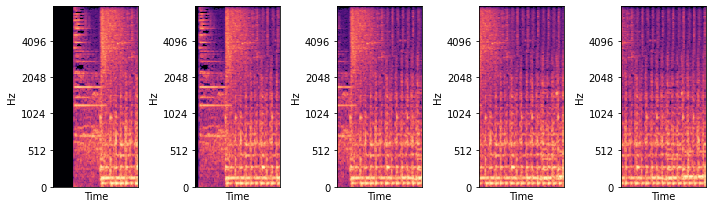

In [13]:
import librosa.display

# Visualizing sliding window examples
n_examples = 5

fig, axes = plt.subplots(1, n_examples, figsize = (10,3))

for i, ax in enumerate(axes.flat):
    # Convert power spectrogram (amplitude squared) to decibel (dB) units
    s_dB = librosa.power_to_db(process_chunk(audio_filepath, chunks[i], segment_length), ref=np.max)
    img = librosa.display.specshow(s_dB, x_axis='time',
                             y_axis='mel',
                             fmax=8000, ax = ax)
    ax.set_xticks([]);
    
fig.tight_layout();